In [5]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

In [6]:
# ucitavanje podataka
# X sadrzi 5000 primjera
# primjer je slika rucno napisane znamenke 0-9
# slike su 20x20 piksela tj svaki primjer je vektor od 400 vrijednosti koje oznacavaju intenzitet na Grayovoj skali 

# y sadrzi labelirane vrijednosti 0-9 koje oznacavaju znamenku tj vektor s 1 vrijednosti
X, y = load_data()

In [7]:
print ('Oblik X: ' + str(X.shape))
print ('Prvi element X: ', X[0])

Oblik X: (5000, 400)
Prvi element X:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-0

In [8]:
print ('Oblik y: ' + str(y.shape))
print ('Prvi element y: ', y[0])

Oblik y: (5000, 1)
Prvi element y:  [0]


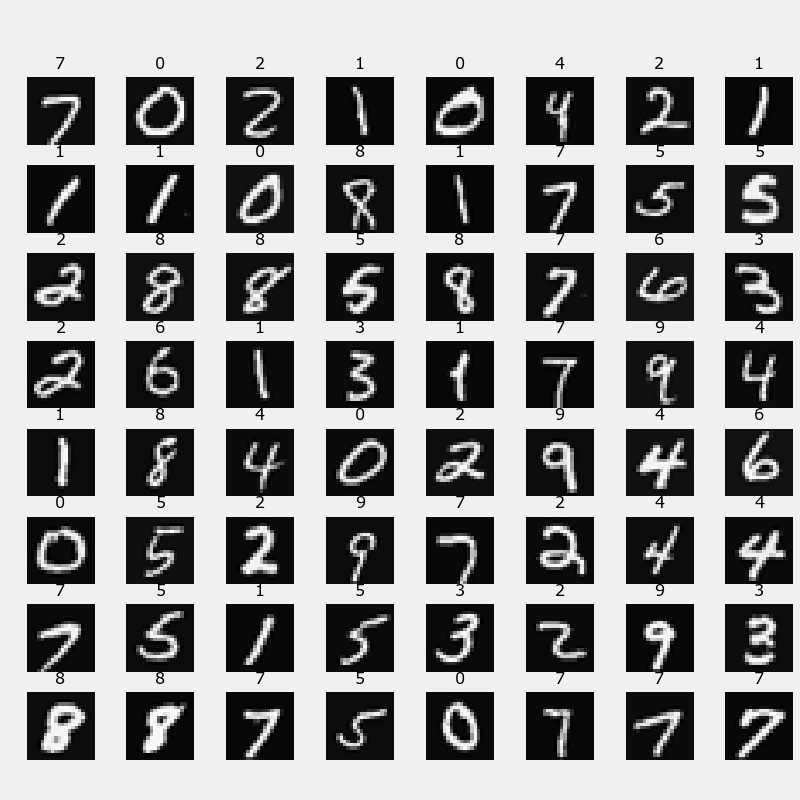

In [9]:
#kod koji nam sluzi za vizualizirati ucitane podatke

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()


In [10]:
#iako kao output sloj mozemo koristiti softmax aktivacijsku funkciju, bolja je praksa (zbog numericke preciznosti) koristiti linearnu
#te zatim tijekom treniranja specificirati da ce se na linearne rezultate primijeniti softmax
model = Sequential(
    [               
        
        tf.keras.Input(shape=(400,)), 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(10, activation = 'linear')
        
    ], name = "my_model" 
)

In [11]:
# from_logits=True specifira da ce se na logitse(linearne vrijednosti output sloja) primijeniti softmax funkcija i tako dobiti
# vektor vjerojatnosti

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 1s 1ms/step - loss: 1.4113
Epoch 2/40
157/157 [==============================] - 0s 1ms/step - loss: 0.5700
Epoch 3/40
157/157 [==============================] - 0s 1ms/step - loss: 0.4252
Epoch 4/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3687
Epoch 5/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3290
Epoch 6/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3033
Epoch 7/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2725
Epoch 8/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2530
Epoch 9/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2358
Epoch 10/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2177
Epoch 11/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2026
Epoch 12/40
157/157 [==============================] - 0s 1ms/step - loss: 0.1861
Epoch 13/40
157/157 [====

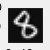

1/1 [==============================] - 0s 75ms/step
 predvidanje: 
[[-8.98 -0.25 -3.46  2.29 -2.74  1.    2.97 -8.43  7.26  1.26]]

 u postocima: 
[[8.64e-08 5.33e-04 2.15e-05 6.78e-03 4.44e-05 1.87e-03 1.33e-02 1.49e-07
  9.75e-01 2.41e-03]]

 najvjerojatnija znamenka: 8
 stvarna znamenka: 8


In [12]:
# primjer predvidanja broja  
# predict metoda daje linearne vrijednosti te ih onda softmax funkcijom pretvaramo u vjerojatnosti
# na temelju najvece vjerojatnosti donosimo zakljucak da je to odredena znamenka

m= X.shape[0]
random_index = np.random.randint(m)
image = X[random_index]
display_digit(image)

prediction = model.predict(image.reshape(1,400))

print(f" predvidanje: \n{prediction}\n")
print(f" u postocima: \n{tf.nn.softmax(prediction)}\n")
print(f" najvjerojatnija znamenka: {np.argmax(prediction)}")
print(f" stvarna znamenka: {y[random_index,0]}")

1/1 [==============================] - 0s 17ms/step


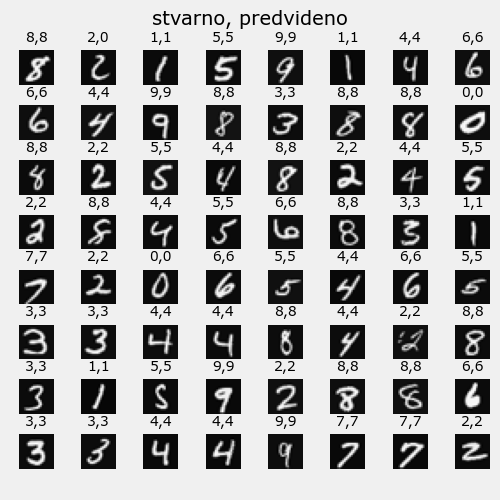

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("stvarno, predvideno", fontsize=14)
plt.show()